In [1]:
import numpy as np


In [3]:
precision = 20
FLD_SIZE = 100000000000000003

def fl2fld(x):
    print(1 << precision)
    fxp = int(x * (1 << precision))
    print(fxp)
    print(FLD_SIZE + fxp)
    fld = (fxp + FLD_SIZE) % FLD_SIZE
    return fld

def fld2fl(x):
    fld = (x + FLD_SIZE/2) % FLD_SIZE - FLD_SIZE/2
    fxp = fld / (1 << precision)
    return fxp

x = -0.9452
print(f"x: {x}, fld: {fl2fld(x)}")

y = 99999999976397529
print(f'y: {y}, fxp: {fld2fl(y)}')

1048576
-991114
99999999999008889
x: -0.9452, fld: 99999999999008889
y: 99999999976397529, fxp: -22.509063720703125


mean: [0.43200000000000005, 0.193]
var: [0.05528109984434102, 0.031638584039112745]
IKNP(libOTe) ,  100
mean: [0.1, 0.084]
var: [0.023664319132398463, 0.0233238075793812]
KKRT ,  100
mean: [0.3804119999999999, 0.18846899999999997]
var: [0.035253947523646176, 0.024987319364029432]
IKNP(emp-ot) ,  100
mean: [0.9702000000000002, 0.9702000000000002]
var: [0.16628277120615953, 0.16628277120615953]
CK-PIR ,  100
mean: [1.1174, 1.1174]
var: [0.055304972651652184, 0.055304972651652184]
DPF-PIR ,  100
mean: [0.178, 0.176]
var: [0.0, 0.0]
Basic ,  100
mean: [0.37, 0.32]
var: [0.0, 0.0]
Fold ,  100
mean: [0.003, 0.002]
var: [0.0, 0.0]
Permute ,  100
mean: [0.40399999999999997, 0.21100000000000002]
var: [0.05986651818838305, 0.029816103031751147]
IKNP(libOTe) ,  10000
mean: [2.752, 2.6830000000000003]
var: [0.08009993757800303, 0.03551056180912941]
KKRT ,  10000
mean: [0.41370799999999996, 0.19663599999999995]
var: [0.05060901516528454, 0.016859825147373268]
IKNP(emp-ot) ,  10000
mean: [4.2231, 4.

<Figure size 432x288 with 0 Axes>

<Figure size 460.8x331.2 with 0 Axes>

<Figure size 460.8x331.2 with 0 Axes>

<Figure size 460.8x331.2 with 0 Axes>

<Figure size 460.8x331.2 with 0 Axes>

<Figure size 460.8x331.2 with 0 Axes>

<Figure size 460.8x331.2 with 0 Axes>

<Figure size 460.8x331.2 with 0 Axes>

<Figure size 460.8x331.2 with 0 Axes>

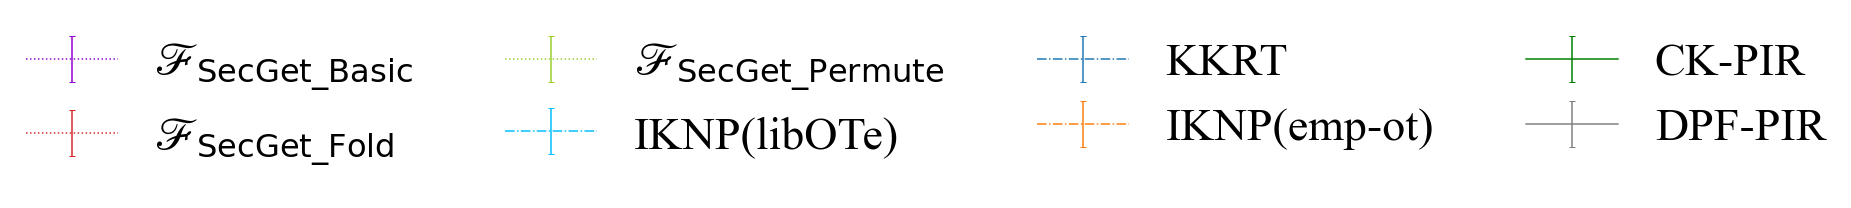

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# draw benchmark data
x = [50, 100]
# LAN data
lan_data = {
    'IKNP(libOTe)': {
        'Online': {
            '100': {
                'B50': [26, 19, 20, 20, 22, 23, 27, 19, 19, 21],
                'B100': [14, 17, 15, 19, 21, 23, 20, 24, 18, 22]
            },
            '10000': {
                'B50': [20, 24, 21, 23, 19, 24, 19, 14, 21, 17],
                'B100': [17, 21, 22, 22, 28, 19, 19, 24, 19, 20]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [44, 34, 46, 47, 34, 52, 48, 47, 48, 50],
                'B100': [40, 41, 40, 46, 39, 44, 45, 45, 38, 45]
            },
            '10000': {
                'B50': [46, 37, 55, 47, 39, 43, 40, 35, 45, 39],
                'B100': [43, 48, 45, 41, 54, 34, 46, 40, 40, 35]
            }
        }
    }, 
    'KKRT': {
        'Online': {
            '100': {
                'B50': [6, 6, 4, 6, 3, 5, 6, 6, 3, 5],
                'B100': [4, 10, 6, 10, 9, 10, 10, 5, 11, 9]
            },
            '10000': {
                'B50': [142, 134, 136, 137, 138, 142, 140, 130, 143, 134],
                'B100': [262, 274, 266, 264, 271, 268, 267, 268, 271, 272]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [48, 46, 38, 53, 43, 43, 42, 46, 46, 47],
                'B100': [43, 62, 48, 56, 51, 62, 53, 51, 66, 42]
            },
            '10000': {
                'B50': [182, 178, 191, 176, 185, 188, 182, 176, 185, 174],
                'B100': [303, 313, 304, 308, 314, 303, 312, 301, 304, 319]
            }
        }
    },
    'IKNP(emp-ot)': {
        'Online': {
            '100': {
                'B50': [20.136, 16.819, 17.859, 21.548, 20.089, 17.181, 17.312, 18.136, 19.104, 22.022],
                'B100': [19.03, 21.853, 19.902, 18.741, 20.862, 22.292, 17.939, 17.151, 17.368, 13.331]
            },
            '10000': {
                'B50': [19.21, 27.445, 20.793, 18.802, 20.117, 21.998, 19.682, 18.411, 21.595, 18.801],
                'B100': [22.254, 17.972, 21.043, 21.416, 17.79, 17.915, 18.706, 21.662, 19.761, 18.117]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [40.092, 33.50553, 35.481, 42.937, 39.958, 34.228, 34.359, 36.125, 38.00257, 43.913],
                'B100': [37.899, 43.541, 39.636, 37.256, 41.587, 44.416, 35.708, 34.141, 34.545, 32.464]
            },
            '10000': {
                'B50': [38.131, 54.508, 41.406, 37.449, 39.245, 43.853, 39.048, 36.59, 43.031, 37.397],
                'B100': [44.332, 35.715, 41.85, 42.582, 35.361, 35.416, 37.211, 43.118, 39.183, 35.97]
            }
        }
    }, 
    'CK-PIR': {
        'Online': {
            '100': {
                'B50': [0.804, 1.243, 1.017, 0.771, 0.978, 1.218, 1.031, 1.034, 0.864, 0.742],
                'B100': [0.804, 1.243, 1.017, 0.771, 0.978, 1.218, 1.031, 1.034, 0.864, 0.742]
            },
            '10000': {
                'B50': [4.215, 4.306, 4.256, 4.353, 4.248, 4.082, 4, 4.259, 4.239, 4.273],
                'B100': [4.215, 4.306, 4.256, 4.353, 4.248, 4.082, 4, 4.259, 4.239, 4.273]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [21.21, 16.651, 19.165, 17.379, 19.114, 18.985, 17.636, 17.22, 18.571, 16.329],
                'B100': [21.21, 16.651, 19.165, 17.379, 19.114, 18.985, 17.636, 17.22, 18.571, 16.329]
            },
            '10000': {
                'B50': [255.714, 245.506, 261.717, 266.011, 263.595, 252.333, 249.516, 253.899, 260.972, 265.405],
                'B100': [255.714, 245.506, 261.717, 266.011, 263.595, 252.333, 249.516, 253.899, 260.972, 265.405]
            }
        }
    },
    'DPF-PIR': {
        'Online': {
            '100': {
                'B50': [1.113, 1.062, 1.174, 1.04, 1.12, 1.056, 1.154, 1.135, 1.092, 1.228],
                'B100': [1.113, 1.062, 1.174, 1.04, 1.12, 1.056, 1.154, 1.135, 1.092, 1.228]
            },
            '10000': {
                'B50': [5.88, 6.01, 5.892, 5.94, 4.56, 5.864, 5.871, 5.93, 5.845, 5.968],
                'B100': [5.88, 6.01, 5.892, 5.94, 4.56, 5.864, 5.871, 5.93, 5.845, 5.968]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [1.113, 1.062, 1.174, 1.04, 1.12, 1.056, 1.154, 1.135, 1.092, 1.228],
                'B100': [1.113, 1.062, 1.174, 1.04, 1.12, 1.056, 1.154, 1.135, 1.092, 1.228]
            },
            '10000': {
                'B50': [5.88, 6.01, 5.892, 5.94, 4.56, 5.864, 5.871, 5.93, 5.845, 5.968],
                'B100': [5.88, 6.01, 5.892, 5.94, 4.56, 5.864, 5.871, 5.93, 5.845, 5.968]
            }
        }
    },
    'Basic': {
        'Online': {
            '100': {
                'B50': [0.178],
                'B100': [0.176]
            },
            '10000': {
                'B50': [19.171],
                'B100': [18.837]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [0.289],
                'B100': [0.266]
            },
            '10000': {
                'B50': [19.687],
                'B100': [19.252]
            }
        }
    },
    'Fold': {
        # 'Online': {
        #     '100': {
        #         'B50': [0.067],
        #         'B100': [0.062]
        #     },
        #     '10000': {
        #         'B50': [0.696],
        #         'B100': [0.659]
        #     }
        # },
        'Online': {
            '100': {
                'B50': [0.37],
                'B100': [0.32]
            },
            '10000': {
                'B50': [3.39],
                'B100': [2.75]
            }
        },
        # 'Offline+Online': {
        #     '100': {
        #         'B50': [0.627],
        #         'B100': [0.542]
        #     },
        #     '10000': {
        #         'B50': [5.786],
        #         'B100': [5.610]
        #     }
        # }
        'Offline+Online': {
            '100': {
                'B50': [0.627],
                'B100': [0.542]
            },
            '10000': {
                'B50': [10.63],
                'B100': [8.27]
            }
        }
    },
    'Permute': {
        'Online': {
            '100': {
                'B50': [0.003],
                'B100': [0.002]
            },
            '10000': {
                'B50': [0.02],
                'B100': [0.02]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [0.15],
                'B100': [0.05]
            },
            '10000': {
                'B50': [8.83],
                'B100': [4.7]
            }
        }
    },
}

wan_data = {
    'IKNP(libOTe)': {
        'Online': {
            '100': {
                'B50': [132, 133, 133, 133, 132, 133, 132, 133, 133, 133],
                'B100': [133, 133, 132, 133, 133, 133, 133, 133, 133, 134]
            },
            '10000': {
                'B50': [132, 133, 133, 133, 133, 130, 133, 133, 133, 133],
                'B100': [134, 134, 134, 131, 133, 134, 142, 134, 134, 134]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [311, 311, 314, 312, 311, 311, 310, 312, 313, 313],
                'B100': [315, 312, 311, 312, 313, 313, 313, 312, 312, 315]
            },
            '10000': {
                'B50': [310, 311, 312, 315, 312, 310, 314, 312, 312, 312],
                'B100': [311, 310, 313, 312, 315, 316, 324, 312, 314, 314]
            }
        }
    }, 
    'KKRT': {
        'Online': {
            '100': {
                'B50': [129, 129, 129, 129, 129, 129, 129, 129, 129, 129],
                'B100': [215, 215, 214, 214, 214, 215, 215, 215, 215, 215]
            },
            '10000': {
                'B50': [616, 613, 616, 620, 612, 615, 618, 615, 619, 638],
                'B100': [970, 970, 1000, 1007, 970, 994, 973, 974, 1004, 988]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [442, 444, 438, 440, 442, 440, 441, 440, 441, 438],
                'B100': [527, 526, 525, 525, 526, 526, 524, 524, 527, 526]
            },
            '10000': {
                'B50': [927, 925, 929, 932, 923, 925, 928, 930, 930, 947],
                'B100': [1280, 1282, 1312, 1318, 1282, 1307, 1285, 1287, 1313, 1301]
            }
        }
    },
    'IKNP(emp-ot)': {
        'Online': {
            '100': {
                'B50': [107.797, 108.691, 109.429, 109.164, 107.526, 107.467, 106.99, 109.018, 108.983, 107.808],
                'B100': [108.128, 108.833, 108.142, 108.895, 108.54, 101.697, 108.738, 106.826, 108.211, 108.001]
            },
            '10000': {
                'B50': [107.671, 108.1, 107.735, 107.81, 107.37, 108.691, 109.278, 107.589, 109.288, 108.63],
                'B100': [108.584, 109.976, 109.161, 109.803, 109.721, 109.871, 110.822, 105.997, 109.057, 109.261]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [174.804, 176.548, 178.047, 177.628, 174.354, 174.084, 173.518, 177.376, 177.113, 174.847],
                'B100': [175.152, 176.467, 175.216, 176.736, 176.031, 162.384, 176.314, 172.546, 175.382, 175.075]
            },
            '10000': {
                'B50': [174.242, 175.022, 174.299, 174.623, 173.715, 176.27, 176.249, 174.041, 177.493, 176.163],
                'B100': [175.444, 178.24, 176.566, 178.071, 177.7, 177.971, 179.863, 170.237, 176.383, 176.765]
            }
        }
    },
    'CK-PIR': {
        'Online': {
            '100': {
                'B50': [81.148, 81.209, 81.478, 80.903, 81.459, 81.285, 80.881, 81.348, 80.046, 81.605],
                'B100': [81.148, 81.209, 81.478, 80.903, 81.459, 81.285, 80.881, 81.348, 80.046, 81.605]
            },
            '10000': {
                'B50': [84.502, 84.64, 84.671, 85.744, 84.521, 84.573, 84.658, 84.545, 85.048, 84.622],
                'B100': [84.502, 84.64, 84.671, 85.744, 84.521, 84.573, 84.658, 84.545, 85.048, 84.622]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [272.012, 271.944, 272.612, 273.145, 271.575, 271.189, 274.938, 270.333, 274.52, 265.503],
                'B100': [272.012, 271.944, 272.612, 273.145, 271.575, 271.189, 274.938, 270.333, 274.52, 265.503]
            },
            '10000': {
                'B50': [680.812, 677.296, 687.751, 687.797, 687.282, 672.811, 673.993, 694.788, 678.75, 682.023],
                'B100': [680.812, 677.296, 687.751, 687.797, 687.282, 672.811, 673.993, 694.788, 678.75, 682.023]
            }
        }
    },
    'DPF-PIR': {
        'Online': {
            '100': {
                'B50': [82.523, 81.314, 81.465, 81.462, 82.468, 81.105, 81.483, 81.24, 82.393, 81.492],
                'B100': [82.523, 81.314, 81.465, 81.462, 82.468, 81.105, 81.483, 81.24, 82.393, 81.492]
            },
            '10000': {
                'B50': [86.16, 86.031, 85.931, 86.111, 86.135, 87.514, 86.189, 86.16, 85.957, 86.04],
                'B100': [86.16, 86.031, 85.931, 86.111, 86.135, 87.514, 86.189, 86.16, 85.957, 86.04]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [82.523, 81.314, 81.465, 81.462, 82.468, 81.105, 81.483, 81.24, 82.393, 81.492],
                'B100': [82.523, 81.314, 81.465, 81.462, 82.468, 81.105, 81.483, 81.24, 82.393, 81.492]
            },
            '10000': {
                'B50': [86.16, 86.031, 85.931, 86.111, 86.135, 87.514, 86.189, 86.16, 85.957, 86.04],
                'B100': [86.16, 86.031, 85.931, 86.111, 86.135, 87.514, 86.189, 86.16, 85.957, 86.04]
            }
        }
    },
    'Basic': {
        # 'Online': {
        #     '100': {
        #         'B50': [1.166],
        #         'B100': [0.763]
        #     },
        #     '10000': {
        #         'B50': [26.011],
        #         'B100': [25.217]
        #     }
        # },
        # 'Offline+Online': {
        #     '100': {
        #         'B50': [2.581],
        #         'B100': [1.509]
        #     },
        #     '10000': {
        #         'B50': [28.423],
        #         'B100': [25.884]
        #     }
        # }
        'Online': {
            '100': {
                'B50': [3.21],
                'B100': [1.59]
            },
            '10000': {
                'B50': [55.95],
                'B100': [55.48]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [7.24],
                'B100': [3.84]
            },
            '10000': {
                'B50': [60.5],
                'B100': [58.34]
            }
        }
    },
    'Fold': {
        # 'Online': {
        #     '100': {
        #         'B50': [1.331],
        #         'B100': [0.721]
        #     },
        #     '10000': {
        #         'B50': [2.405],
        #         'B100': [1.637]
        #     }
        # },
        # 'Offline+Online': {
        #     '100': {
        #         'B50': [4.974],
        #         'B100': [3.008]
        #     },
        #     '10000': {
        #         'B50': [11.514],
        #         'B100': [9.774]
        #     }
        # }
        'Online': {
            '100': {
                'B50': [5.37],
                'B100': [2.74]
            },
            '10000': {
                'B50': [5.12],
                'B100': [3.41]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [13.84],
                'B100': [8.87]
            },
            '10000': {
                'B50': [38.99],
                'B100': [33.62]
            }
        }
    },
    'Permute': {
        'Online': {
            '100': {
                'B50': [1.69],
                'B100': [0.88]
            },
            '10000': {
                'B50': [2.09],
                'B100': [0.91]
            }
        },
        'Offline+Online': {
            '100': {
                'B50': [11.64],
                'B100': [5.72]
            },
            '10000': {
                'B50': [12.64],
                'B100': [6.57]
            }
        }
    },
}

line_style = {
    'IKNP(libOTe)': '-.',
    'KKRT': '-.',
    'IKNP(emp-ot)': '-.',
    'Basic': ':',
    'Fold': ':',
    'Permute': ':',
    'CK-PIR': '-',
    'DPF-PIR': '-',
}

line_color = {
    'IKNP(libOTe)': 'deepskyblue',
    'KKRT': 'tab:blue',
    'IKNP(emp-ot)': 'tab:orange',
    'Basic': 'darkviolet',
    'Fold': 'tab:red',
    'Permute': 'yellowgreen',
    'CK-PIR': 'green',
    'DPF-PIR': 'grey',
}

legend = {
    'Basic': '$\mathscr{F}_\mathsf{SecGet\_Basic}$',
    'Fold': '$\mathscr{F}_\mathsf{SecGet\_Fold}$',
    'Permute': '$\mathscr{F}_\mathsf{SecGet\_Permute}$',
    'IKNP(libOTe)': 'IKNP(libOTe)',
    'KKRT': 'KKRT',
    'IKNP(emp-ot)': 'IKNP(emp-ot)',
    'CK-PIR': 'CK-PIR',
    'DPF-PIR': 'DPF-PIR',
}

font_family = 'Times New Roman'
font_size = {'ax_label': 24, 'ax_tick': 22, 'inner_tick': 14, 'text': 15, 'legend': 12}

batch_size = [50, 100]
datasets = ['IKNP(libOTe)', 'KKRT', 'IKNP(emp-ot)', 'CK-PIR', 'DPF-PIR', 'Basic', 'Fold', 'Permute']
phases = ['Online', 'Offline+Online']
domain_size = ['100', '10000']
networks = ['LAN', 'WAN']

data = {
    'LAN': lan_data,
    'WAN': wan_data
}


def draw_fig():
    for network in networks:
        for row, phase in enumerate(phases):
            for col, dim in enumerate(domain_size):
                plt.clf()
                # default=(6.4, 4.8)
                plt.figure(figsize=(6.4, 4.6))
                ax = plt.subplot()
                for dataset in datasets:
                    ys_online_100 = data[network][dataset][phase][dim]
                    mean = []
                    var = []
                    for i in batch_size:
                        dividend = 1 if dataset in ['Basic', 'Fold', 'Permute', "DPF-PIR", 'CK-PIR'] else i
                        mean.append(np.mean(np.array(ys_online_100['B'+str(i)])) / float(dividend))
                        var.append(np.std(np.array(ys_online_100['B'+str(i)]) / float(dividend)))

                    print(f'mean: {mean}')
                    print(f'var: {var}')
                    # if dataset == 'DPF-PIR' and dim == '100':
                    #     continue
                    print(dataset, ", ", dim)
                    
                    ax.errorbar(batch_size, mean, var, label=legend[dataset], linestyle=line_style[dataset], color=line_color[dataset])
                    for j in range(len(batch_size)):
                        ax.plot(batch_size[j], mean[j], marker='o', color=line_color[dataset])

                ax.grid(True, alpha=0.5, linestyle='--')
                # if f'{network}-{phase}-{dim}' == 'LAN-Online-100':
                #     ax.set_ylim(0, 1.5)
                ax.set_yscale('log')
                ax.set_xlabel('Batch Size', fontfamily=font_family, fontsize=font_size['ax_label'])
                ax.set_ylabel('Time (ms)', fontfamily=font_family, fontsize=font_size['ax_label'])
                
                # ax.set_xlim(ax_param[dataset]['xlim'])
                # ax.set_ylim(ax_param[dataset]['ylim'])
                ax.set_xticks(batch_size)
                # ax.set_yticks(np.linspace(ax_param[dataset]['ylim'][0], ax_param[dataset]['ylim'][1], ax_param[dataset]['ytick_num']))
                ax.tick_params(labelsize=font_size['ax_tick'])
                # plt.legend(prop={'family': font_family, 'size': font_size['legend']}, loc='best')
                # plt.show()
                plt.tight_layout()
                plt.savefig(f'{network}-{phase}-{dim}.pdf')


def raw_data_legend():

    font_legend = {'family': font_family, 'size': 46}
    
    plt.clf()
    plt.figure(figsize=(28, 3))
    ax = plt.subplot() # type: Axes
    ax.axis('off')
    
    for label in legend.keys():
        ax.errorbar(0, 0, 0, capsize=3, capthick=1, label=legend[label], linestyle=line_style[label], color=line_color[label])
    
    ax.set_xlim(left=1)
    # 按照paint.legend顺序排列
    handles,labels = ax.get_legend_handles_labels()
    handles, labels = zip(*sorted(zip(handles, labels), key=lambda x: list(legend.values()).index(x[1])))
    ax.legend(handles, labels, prop=font_legend, loc='center', ncol=4, frameon=False)
    # plt.show()
    plt.tight_layout()
    plt.savefig('SecGet-legend.pdf')
draw_fig()
raw_data_legend()

[[1.88879958, 0.94537663], [2.86743308, 1.41622832], [4.030476, 2.02984309]]
[[4.29456, 2.60846], [4.51674, 2.67851], [4.44396, 2.76627]]
[[87.86955414, 44.00230119], [140.3121987, 70.157302], [192.6735521, 96.38674419]]
[[20.181, 10.4096], [22.056, 11.4098], [23.865, 12.2354]]


<Figure size 432x288 with 0 Axes>

<Figure size 460.8x324 with 0 Axes>

<Figure size 460.8x324 with 0 Axes>

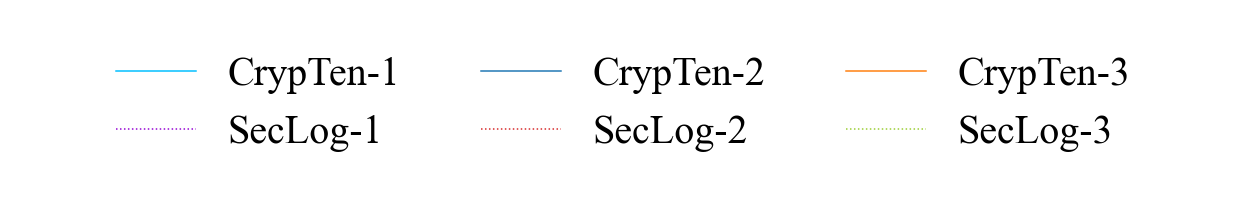

In [23]:
import matplotlib.pyplot as plt
import numpy as np

lan_log_data = {
    'CrypTen': {
        'Online': {
            'B50': [1.88879958, 2.86743308, 4.030476],
            'B100': [0.94537663, 1.41622832, 2.02984309]
        },
    }, 
    'SecLog': {
        'Online': {
            'B50': [4.29456, 4.51674, 4.44396],
            'B100': [2.60846, 2.67851, 2.76627]
        },
    }, 
}

wan_log_data = {
    'CrypTen': {
        'Online': {
            'B50': [87.86955414, 140.3121987, 192.6735521],
            'B100': [44.00230119, 70.157302, 96.38674419]
        },
    }, 
    'SecLog': {
        'Online': {
            'B50': [20.181, 22.056, 23.865],
            'B100': [10.4096, 11.4098, 12.2354]
        },
    }, 
}

font_family = 'Times New Roman'
font_size = {'ax_label': 24, 'ax_tick': 22, 'inner_tick': 14, 'text': 15, 'legend': 12}

line_style = {
    'CrypTen-1': '-',
    'CrypTen-2': '-',
    'CrypTen-3': '-',
    'SecLog-1': ':',
    'SecLog-2': ':',
    'SecLog-3': ':',
}

line_color = {
    'CrypTen-1': 'deepskyblue',
    'CrypTen-2': 'tab:blue',
    'CrypTen-3': 'tab:orange',
    'SecLog-1': 'darkviolet',
    'SecLog-2': 'tab:red',
    'SecLog-3': 'yellowgreen',
}

legend = {
    'CrypTen-1': 'CrypTen-1',
    'SecLog-1': 'SecLog-1',
    'CrypTen-2': 'CrypTen-2',
    'SecLog-2': 'SecLog-2',
    'CrypTen-3': 'CrypTen-3',
    'SecLog-3': 'SecLog-3'
}

batch_size = [50, 100]
phases = ['Online', 'Offline+Online']
domain_size = ['100', '10000']
networks = ['LAN', 'WAN']

impls = ['CrypTen', 'SecLog']
log_data = {
    'LAN': lan_log_data,
    'WAN': wan_log_data
}


def draw_seclog():
    for network in networks:
        plt.clf()
        # default=(6.4, 4.8)
        plt.figure(figsize=(6.4, 4.5))
        ax = plt.subplot()
        for impl in impls:
            ys_online_100 = log_data[network][impl]['Online']
            tmp = []
            for i in batch_size:
                tmp.append(ys_online_100['B'+str(i)])
            lines = []
            for i in range(len(tmp[0])):
                tt = []
                for b in range(len(tmp)):
                    tt.append(tmp[b][i])
                lines.append(tt)
            print(lines)
            for i in range(len(lines)):
                ax.errorbar(batch_size, lines[i], capsize=3, capthick=1, label=impl+'-'+str(i+1), linestyle=line_style[impl+'-'+str(i+1)], color=line_color[impl+'-'+str(i+1)])
                for j in range(len(batch_size)):
                    ax.plot(batch_size[j], lines[i][j], marker='o', color=line_color[impl+'-'+str(i+1)])

        ax.grid(True, alpha=0.5, linestyle='--')
        # ax.set_xscale('symlog')
        ax.set_xlabel('Batch Size', fontfamily=font_family, fontsize=font_size['ax_label'])
        ax.set_ylabel('Time (ms)', fontfamily=font_family, fontsize=font_size['ax_label'])
        # ax.set_xlim(ax_param[dataset]['xlim'])
        # ax.set_ylim(ax_param[dataset]['ylim'])
        ax.set_xticks(batch_size)
        # ax.set_yticks(np.linspace(ax_param[dataset]['ylim'][0], ax_param[dataset]['ylim'][1], ax_param[dataset]['ytick_num']))
        ax.tick_params(labelsize=font_size['ax_tick'])
        # plt.legend(prop={'family': font_family, 'size': font_size['legend']}, loc='best')
        # plt.show()
        plt.tight_layout()
        plt.savefig(f'{network}-Online-SecLog.pdf')

def raw_data_legend():

    font_legend = {'family': font_family, 'size': 40}
    
    plt.clf()
    plt.figure(figsize=(18, 3))
    ax = plt.subplot() # type: Axes
    ax.axis('off')
    
    for label in legend.keys():
        ax.plot(0, 0, label=legend[label], linestyle=line_style[label], color=line_color[label])
    
    ax.set_xlim(left=1)
    # 按照paint.legend顺序排列
    handles,labels = ax.get_legend_handles_labels()
    handles, labels = zip(*sorted(zip(handles, labels), key=lambda x: list(legend.values()).index(x[1])))
    ax.legend(handles, labels, prop=font_legend, loc='center', ncol=3, frameon=False)
    # plt.show()
    plt.tight_layout()
    plt.savefig('SecLog-legend.pdf')

draw_seclog()
raw_data_legend()

In [10]:
0.178/0.003


59.33333333333333